<a href="https://colab.research.google.com/github/masgro/diplodatos/blob/master/Practico_I_AyV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
<font color='red'> Para el año 2016, LATAM tuvo una media del índice pf_identity de **8.01**, y esto es aproximadamente un punto por sobre la media mundial (**6.98**). Sucede lo contrario si comparamos las medianas de dicho índice donde, para el mundo la mediana de pf_identity es de **8.0**, mientras que para LATAM este valor es de **7.5**. Lo cual nos habla de la asimetría de la distribución del índice. 
Por otro lado, si comparamos el índice global hf_score, en LATAM este tiene una media (mediana) de **6.95** (6.99), mientras que en el mundo la media es de **6.89** (6.82), encontrándose LATAM por encima de los valores mundiales.</font>
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
<font color='red'>A lo largo de los años, los índices muestran un leve empeoramiento para el caso de LATAM, donde el índice hf_score a disminuído a un paso de 0.02 puntos anuales, mientras que el índice pf_identity a disminuído a un ritmo de 0.1. Sin embargo, la caída de este último índice está relacionada con la incorporación de otros registros para la determinación del mismo, por ejemplo, el índice pf_identity_legal ha sido incorporado recién en 2015 y su valor es bajo en comparación a la media del índice pf_identity. Por lo que es preciso realizar consideraciones mayores a la hora de expresar una conclusión.</font>
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?
<font color='red'>El índice hf_score se estima tomando el promedio entre otros dos estimadores, el ef_score y el pf_score. A su vez, este último es la composición de otros indicadores entre los que se encuentra pf_identity. Es por ello, que los índices hf_score y ef_score están fuertemente correlacionados, mientras que la correlación entre el indicador ef_score y el pf_identity es débil, aunque igualmente positiva.</font>

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
%pylab inline
import pandas
import seaborn as sns
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
filename = 'DataBases/hfi_cc_2018.csv'
dataset = pandas.read_csv(filename)
dataset.shape

(1458, 123)

In [3]:
dataset.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [4]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'pf_score', # Personal Freedom (score)
    'pf_rank',  # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank',  # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank',  # Human Freedom (rank)
]

In [5]:
dataset[important_cols].head()

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.596281,57.0,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,5.281772,147.0,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,6.111324,117.0,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,8.099696,42.0,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,6.912804,84.0,7.57,29.0,7.241402,57.0


In [6]:
#Re-definimos el dataset para quedarnos con las columnas de interes
data = dataset[important_cols]

In [7]:
data.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_identity_legal',
       'pf_identity_parental_marriage', 'pf_identity_parental_divorce',
       'pf_identity_parental', 'pf_identity_sex_male',
       'pf_identity_sex_female', 'pf_identity_sex', 'pf_identity_divorce',
       'pf_identity', 'pf_score', 'pf_rank', 'ef_score', 'ef_rank', 'hf_score',
       'hf_rank'],
      dtype='object')

In [8]:
#Definimos algunas máscaras para  utilizar luego
Year = data['year'] == 2016
LA = data['region'] == "Latin America & the Caribbean"
VNZ = data['countries'] == 'Venezuela'
MENA = data['region'] == "Middle East & North Africa"
ARG = data["countries"] == "Argentina"
URG = data["countries"] == "Uruguay"
CHL = data["countries"] == "Chile"

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

**1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.**

In [9]:
data.describe()

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
count,1458.000000,205.000000,923.000000,923.000000,1358.000000,1375.000000,1378.000000,1378.000000,585.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,6.307317,7.248104,7.632719,7.428203,6.709091,7.935414,7.325835,7.538462,7.334180,7.201278,77.221335,6.785610,76.973149,6.993444,77.007983
std,2.582875,3.635095,3.953387,3.689772,3.705913,4.683089,4.028877,4.048606,3.644142,3.159473,1.374947,44.494004,0.883601,44.540142,1.025811,44.506549
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.166555,1.000000,2.880000,1.000000,3.765827,1.000000
25%,2010.000000,7.000000,5.000000,5.000000,5.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.197388,39.000000,6.250000,38.000000,6.336685,39.000000
50%,2012.000000,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.166667,7.189009,77.000000,6.900000,77.000000,6.923840,76.000000
75%,2014.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.449475,115.000000,7.410000,115.000000,7.894660,115.000000
max,2016.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.568154,162.000000,9.190000,162.000000,9.126313,162.000000


<span style="color:red">Verificamos que datos hay por período</span>

In [10]:
data.pivot_table([x for x in important_cols if '_' in x ],'year',aggfunc='count')

,ISO_code,ef_rank,ef_score,hf_rank,hf_score,pf_identity,pf_identity_divorce,pf_identity_legal,pf_identity_parental,pf_identity_parental_divorce,pf_identity_parental_marriage,pf_identity_sex,pf_identity_sex_female,pf_identity_sex_male,pf_rank,pf_score
year,,,,,,,,,,,,,,,,
2008,162,141,141,141,141,141,0,0,140,0,0,141,141,140,141,141
2009,162,141,141,141,141,141,0,0,140,0,0,141,141,140,141,141
2010,162,153,153,153,153,153,0,0,151,0,0,153,153,152,153,153
2011,162,153,153,153,153,153,0,0,151,149,151,153,153,153,153,153
2012,162,153,153,153,153,153,0,0,151,149,151,153,153,153,153,153
2013,162,157,157,157,157,157,144,0,154,154,153,157,157,157,157,157
2014,162,159,159,159,159,159,146,0,156,156,155,159,159,159,159,159
2015,162,159,159,159,159,159,146,102,156,156,155,159,159,159,159,159
2016,162,162,162,162,162,162,149,103,159,159,158,162,162,162,162,162


<font color="red">**Del analisis observamos:**
* Hay mediciones que van de 2008 al 2016 y se realizaron en 162 países.
* El rango de los índices va de 0.0 y 10.0
* Para un período dado, hay índices que no fueron calculados en todos los países. Ej: pf_identity se cauculó para 141 países en 2008, 157 en 2013 y recién para todos en 2016.
* En la serie temporal, hay índices que comenzaron a calcularse en años posteriores y eso afecta al ínicie final que se analiza. Ej: pf_identity_divorce tiene info desde 2013 (para 144 países) y pf_identity_legal desde 2015 para solo 102 países</font>

**2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda?**

<span style="color:red">No tiene sentido calcular la moda pues son valores continuos.</span>

In [11]:
#Calculo promedios por Region
promedios=data.pivot_table(['pf_identity','hf_score'],'region',aggfunc=['mean','median','std'], margins=True, margins_name='Worldwide')
promedios

mean                median              \
                               hf_score pf_identity  hf_score pf_identity   
region                                                                      
Caucasus & Central Asia        6.879506    8.714744  6.766759    8.333333   
East Asia                      7.813020    9.861111  8.109151   10.000000   
Eastern Europe                 7.671637    9.683333  7.814029   10.000000   
Latin America & the Caribbean  7.047982    8.765086  7.028045   10.000000   
Middle East & North Africa     6.051464    2.830000  6.289613    2.500000   
North America                  8.461915    9.833333  8.484161   10.000000   
Oceania                        7.858762    9.152778  8.033486   10.000000   
South Asia                     6.533740    5.735294  6.585634    5.833333   
Sub-Saharan Africa             6.256850    5.567050  6.276072    5.000000   
Western Europe                 8.368293    9.871399  8.398904   10.000000   
Worldwide                      6.993444    7.334180  6.923840    9.166667   

                                    std              
                               hf_score pf_identity  
region                                               
Caucasus & Central Asia        0.577477    1.429093  
East Asia                      0.947502    0.294071  
Eastern Europe                 0.554830    0.768090  
Latin America & the Caribbean  0.608904    1.711732  
Middle East & North Africa     0.906600    3.165090  
North America                  0.176386    0.320844  
Oceania                        0.915284    1.415826  
South Asia                     0.697855    3.302767  
Sub-Saharan Africa             0.694003    2.445204  
Western Europe                 0.219079    0.327340  
Worldwide                      1.025811    3.159473

In [12]:
def extrae(v):
   r=pandas.DataFrame({'region':list(promedios.index),
                       'mean':list(promedios[('mean',v)]),
                       'median':list(promedios[('median',v)]),
                       'std':list(promedios[('std',v)])})
   return r[ (r['region'] == 'Worldwide') | (r['region'] =='Latin America & the Caribbean' )]

pf_identity=extrae('pf_identity')
hf_score=extrae('hf_score')

<font color='red'>**Tabla de comparación de índice pf_identity**
* LATAM está casi un punto y medio arriba del promedio Mundial.
* Este promedio está a su vez más de un punto abajo de la mediana, lo que indica que hay países con bajos índices que disminuyen el valor de la media</font>

In [13]:
pf_identity

,region,mean,median,std
3,Latin America & the Caribbean,8.765086,10.000000,1.711732
10,Worldwide,7.334180,9.166667,3.159473


<font color='red'>**Tabla de comparación de índice hf_score**
* LATAM está apenas por arriba del promedio Mundial.
* A su vez, este valor es muy similar a la mediana</font>

In [14]:
hf_score

,region,mean,median,std
3,Latin America & the Caribbean,7.047982,7.028045,0.608904
10,Worldwide,6.993444,6.923840,1.025811


**3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?**

<span style="color:red">Si bien se observa que hay alguna tendencia de que a mayor pf_identity el país tiene mayor hf_score, la dispersión es grande, y evaluando la composición de los índices concluimos que no son directamente comparables. Hay otras variables como las relacionadas a la libertad económica.</span>

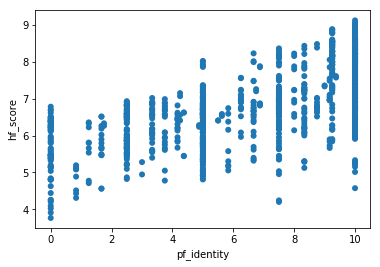

In [15]:
sns.scatterplot(x=data['pf_identity'],y=data['hf_score'],edgecolor='None')

**4. ¿Cómo pueden sanearse los valores faltantes?**

<span style="color:red">En nuestro caso se eliminaron los valores faltantes, para algunos calculos, directamente a traves de la biblioteca ultilizada (_pandas_), y en otros calculando el promedio. Creemos que para dar una respuesta más apropiada al saneamiento de los datos faltantes estaría bueno tener las herramientas que nos brindara el próximo modulo de Análisis Exploratorio y Curación de Datos.</span>

**5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?**

<span style="color:red">Si, existen outliers para las dos variables. Para identificar los outliers graficamos los boxplots y observamos los paises que caían fuera de los cuantiles. Particularmente, en el caso de LATAM, Venezuela es un outlier en todos los años, no así a nivel mundial, en el cual se repite solo un par de veces, por lo que concluimos que los outliers son a nivel grupal. En principio no descartaríamos los outliers porque forman parte de la muestra.</span>

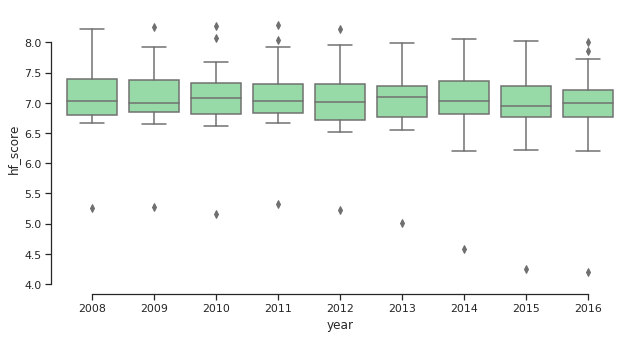

In [16]:
plt.figure(figsize=(10,5))
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="year", y="hf_score",data=data[LA],palette=["g"])
sns.despine(offset=10, trim=True)

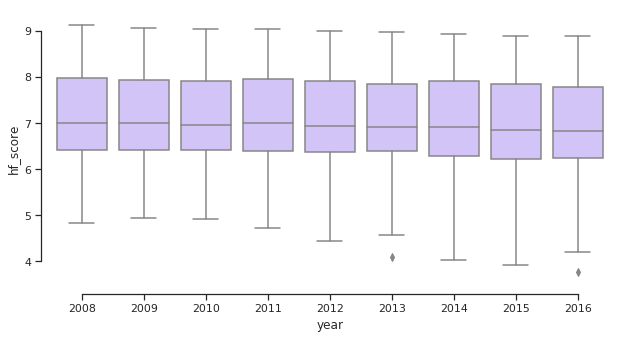

In [17]:
plt.figure(figsize=(10,5))
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="year", y="hf_score",data=data,palette=["m"])
sns.despine(offset=10, trim=True)

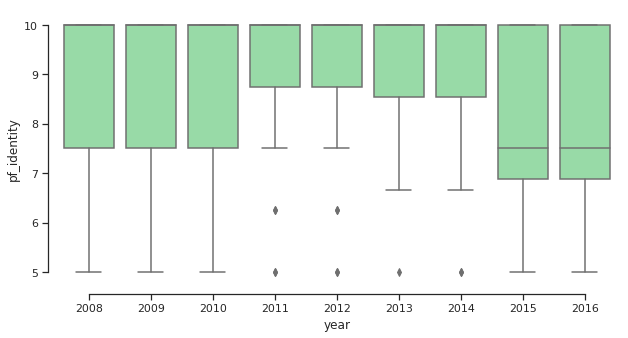

In [18]:
plt.figure(figsize=(10,5))
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="year", y="pf_identity",data=data[LA],palette=["g"])
sns.despine(offset=10, trim=True)

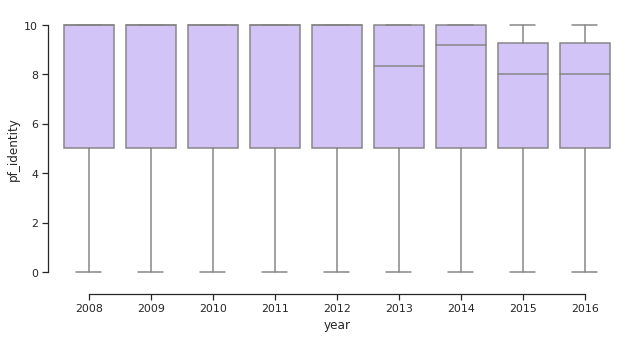

In [19]:
plt.figure(figsize=(10,5))
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="year", y="pf_identity",data=data,palette=["m"])
sns.despine(offset=10, trim=True)

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

**1. Grafiquen la media de la variable pf_identity y hf_score a través de los años.**

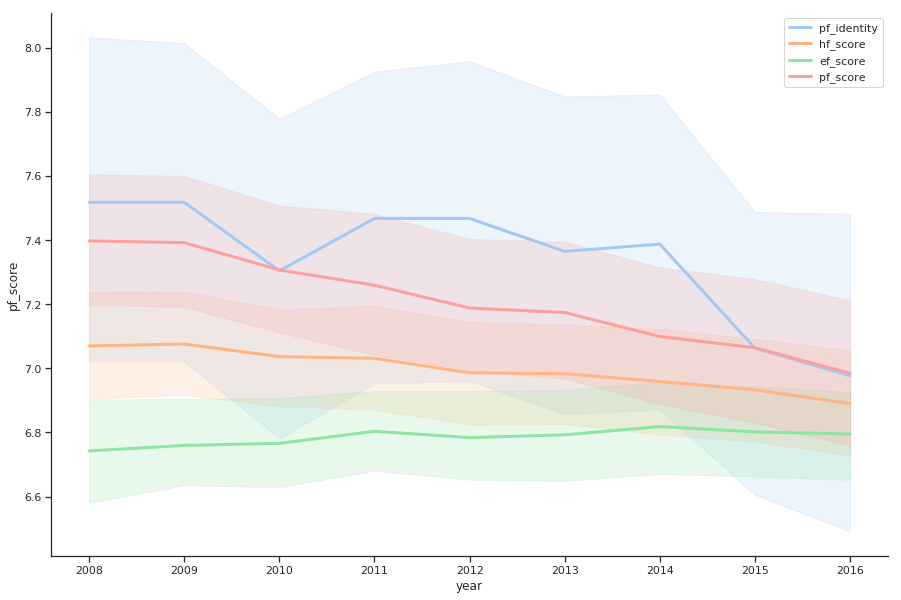

In [21]:
plt.figure(figsize=(15,10))
sns.set_context("notebook")
sns.lineplot(x='year',y='pf_identity',data=data,lw=3.0,label="pf_identity")
sns.lineplot(x='year',y='hf_score',data=data,lw=3.0,label="hf_score")
sns.lineplot(x='year',y='ef_score',data=data,lw=3.0,label="ef_score")
sns.lineplot(x='year',y='pf_score',data=data,lw=3.0,label="pf_score")
plt.legend()
sns.despine()

**2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?**

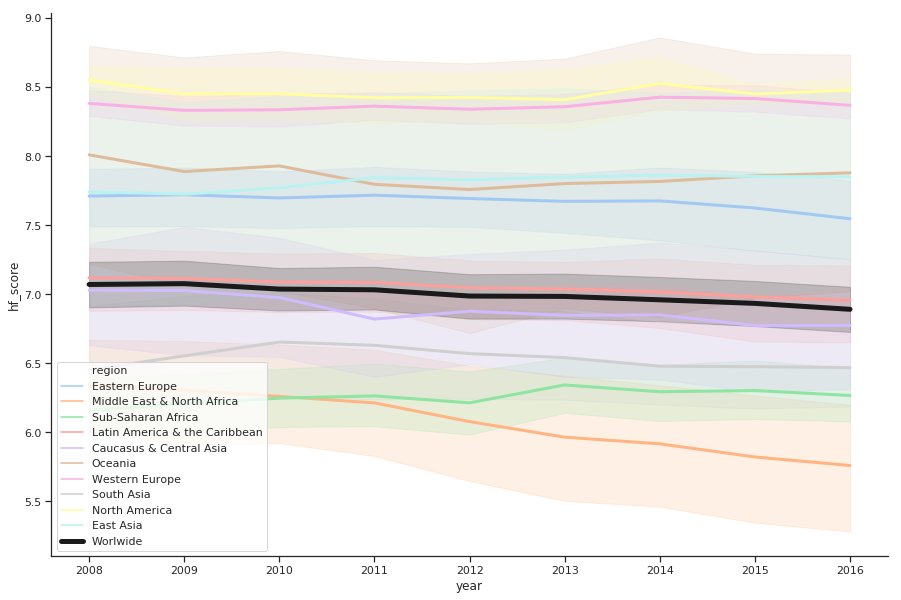

In [22]:
plt.figure(figsize=(15,10))
sns.set_context("notebook")
sns.lineplot(x='year',y='hf_score',data=data,hue='region',lw=3.0)
sns.lineplot(x='year',y='hf_score',data=data,lw=5.0,color='k',label="Worlwide")
sns.despine()

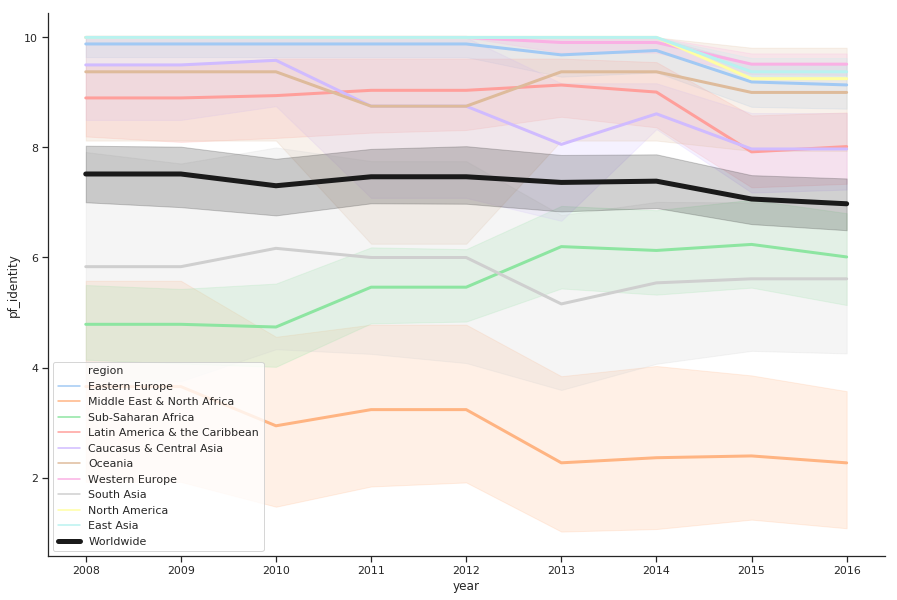

In [23]:
plt.figure(figsize=(15,10))
sns.set_context("notebook")
sns.lineplot(x='year',y='pf_identity',data=data,hue='region',lw=3.0)
sns.lineplot(x='year',y='pf_identity',data=data,lw=5.0,color='k',label="Worldwide")
sns.despine()

<span style="color:red">Observamos que la tendencia por region es la misma que la global.</span>

**3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?**

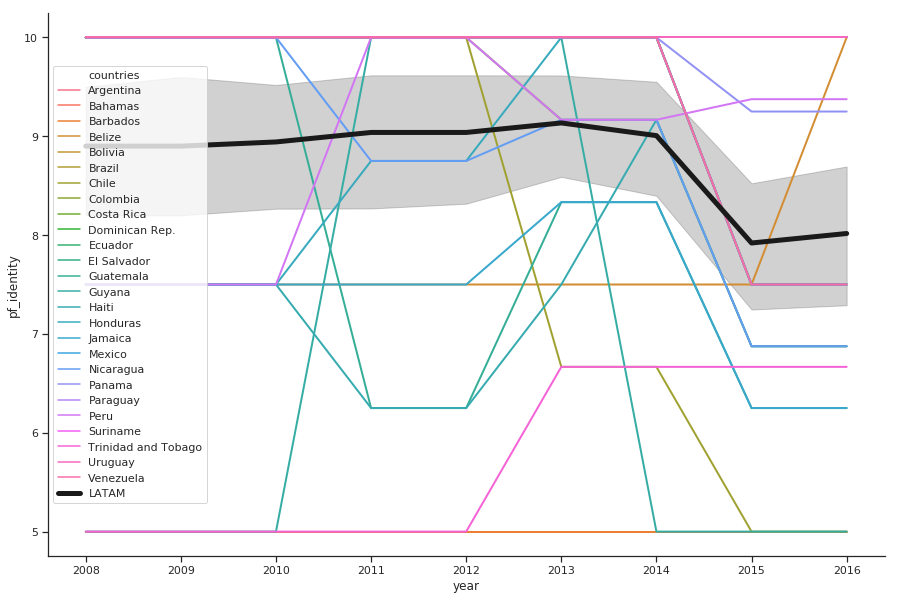

In [24]:
plt.figure(figsize=(15,10))
sns.set_context("notebook")
sns.lineplot(x='year',y='pf_identity',data=data[LA],hue='countries',lw=2.0)
sns.lineplot(x='year',y='pf_identity',data=data[LA],lw=5.0,color='k',label="LATAM")
sns.despine()

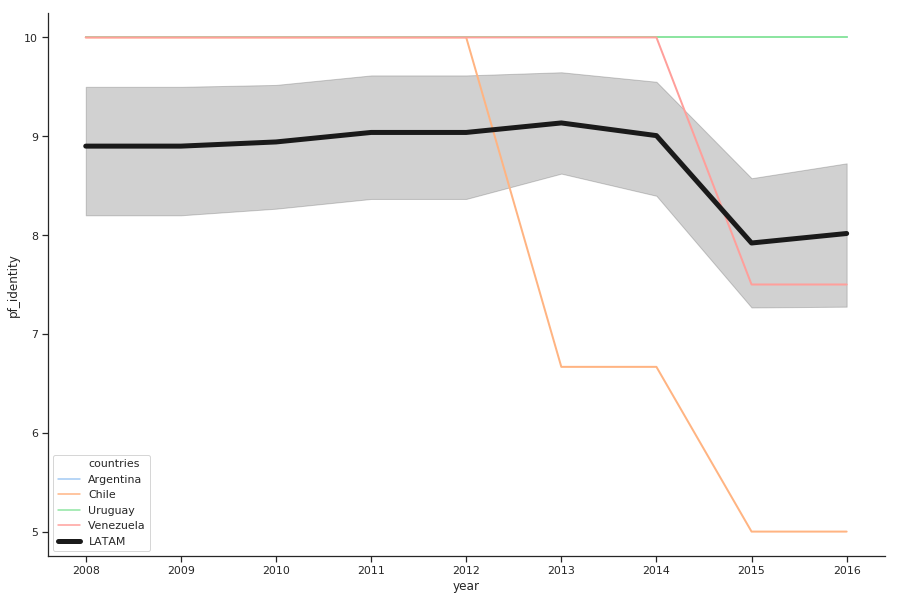

In [25]:
plt.figure(figsize=(15,10))
sns.set_context("notebook")
sns.lineplot(x='year',y='pf_identity',data=data[LA & (ARG | VNZ | URG | CHL)],hue='countries',lw=2.0)
sns.lineplot(x='year',y='pf_identity',data=data[LA],lw=5.0,color='k',label="LATAM")
sns.despine()

<span style="color:red">La caída de pf_identity tiene que ver con que no hay datos de algunos de los índices que lo componen, particularmente pf_identity_legal recién aparece en 2015 y con un valor promedio en LATAM bajo dado que su distribución en los últimos años en binaria (0 y 10). A medida que se agregan índices para construir el índice de pf_score el promedio lo tira para abajo, como se puede observar en los graficos abajo exhibidos.</span>

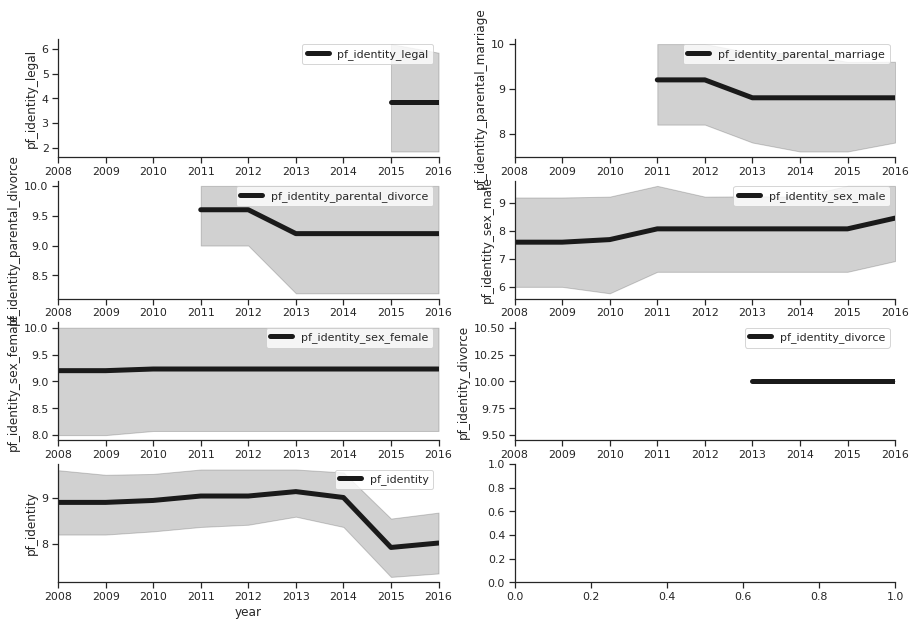

In [26]:
fields = ['pf_identity_legal','pf_identity_parental_marriage','pf_identity_parental_divorce',
'pf_identity_sex_male','pf_identity_sex_female', 
'pf_identity_divorce','pf_identity']

#fields = ['pf_identity_sex_male','pf_identity_sex_female','pf_identity']

a = data[LA][fields]

f,axes = plt.subplots(4,2,figsize=(15,10))
sns.set_context("notebook")

for i,field in enumerate(fields):
    #sns.lineplot(x='year',y=field,data=data[LA],lw=2.0,label=field,hue='countries',ax=axes[int(i/2),i%2],alpha=0.2,legend=False)
    sns.lineplot(x='year',y=field,data=data[LA],lw=5.0,label=field,color='k',ax=axes[int(i/2),i%2])
    axes[int(i/2),i%2].set_xlim(2008,2016)


sns.despine()

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

**1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?**

<span style="color:red">Aqui dibujamos las distribuciones de las variables pf_identity y hf_score para LA y el Mundo y para todos los años (i.e., no hicimos el promedio en los años)</span>

/home/marioagustin/MiniConda/envs/diplodatos/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/marioagustin/MiniConda/envs/diplodatos/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


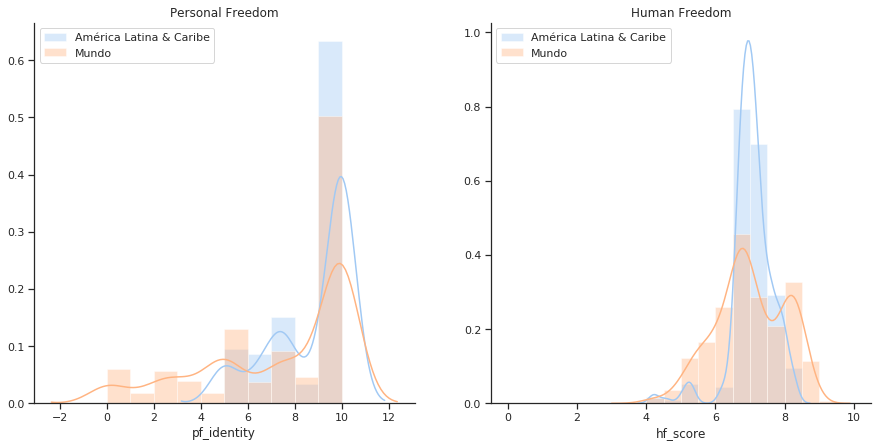

In [27]:
f, axes = plt.subplots(1, 2, figsize=(15, 7))
bins = np.linspace(0,10,11)
sns.distplot(data[LA]['pf_identity'], label='América Latina & Caribe',ax=axes[0],kde=True,norm_hist=True,bins=bins)
sns.distplot(data['pf_identity'], label='Mundo',ax=axes[0],kde=True,norm_hist=True,bins=bins)

axes[0].legend()
axes[0].set_title("Personal Freedom")

bins = np.linspace(0,10,21)
sns.distplot(data[LA]['hf_score'], label='América Latina & Caribe',ax=axes[1],kde=True,norm_hist=True,bins=bins)
sns.distplot(data['hf_score'], label='Mundo',ax=axes[1],kde=True,norm_hist=True,bins=bins)

axes[1].legend()
axes[1].set_title("Human Freedom")


sns.despine()

<span style="color:red">En los gráficos que siguen hacemos el análisis para cada variable en cuanto a su comparación con una distribución normal.
Luego de algunas discusiones llegamos a la conclusión que es mejor hacer hacer un promedio en los 9 años para cada pais, y tomar las distribuciones de estas nuevas variables promediadas</span>

**2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.**

**3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar ambas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.**

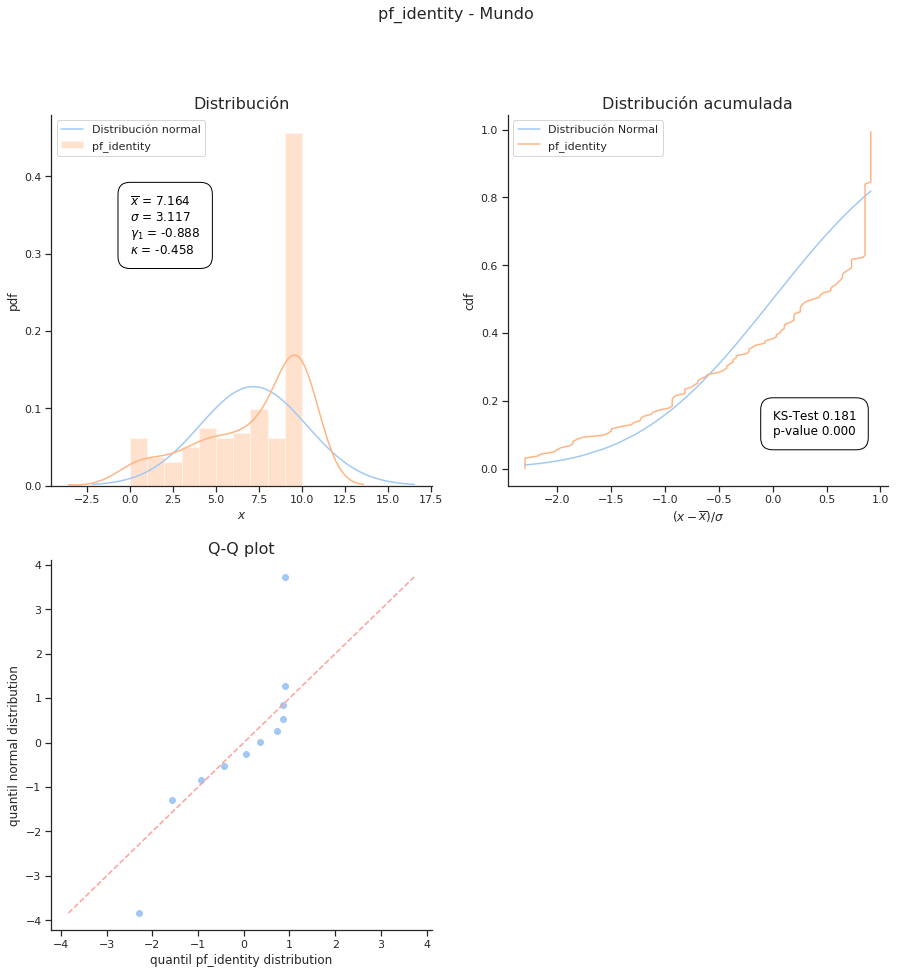

In [28]:
f, axes = plt.subplots(2, 2, figsize=(15, 15))
f.suptitle('pf_identity - Mundo', fontsize=16)

datos = data
datos = datos.pivot_table('pf_identity','countries',aggfunc=['mean'])
datos = datos['mean']['pf_identity']

xm = datos.mean()
std = datos.std()
skew = stats.skew(datos)
kur = stats.kurtosis(datos)
#print("Media: ",xm)
#print("Desviación estandar: ",std)
#print("Skewness: ",skew)
#print("Kurtosis: ",kur)

norm_dist = stats.norm(xm, std)
_x = np.linspace(xm-3.0*std,xm+3.0*std,100)
_y = norm_dist.pdf(_x)
sns.lineplot(_x,_y,label='Distribución normal',ax=axes[0,0])

bins = np.linspace(0,10,11)
sns.distplot(datos, label='pf_identity',ax=axes[0,0],kde=True,norm_hist=True,bins=bins)

axes[0,0].set_ylabel("pdf")
axes[0,0].set_xlabel("$x$")
axes[0,0].legend()
axes[0,0].set_title('Distribución',fontsize=16)
axes[0,0].text(0.0, 0.3, '$\overline{x}$ = %.3f\n$\sigma$ = %.3f\n$\gamma_1$ = %.3f\n$\kappa$ = %.3f' %(xm,std,skew,kur) , color='black', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

#Normalizamos los datos para poder compararlos con la distribución normal (media=0.0,sigma=1.0)
datos = (datos-xm)/std
ks = stats.kstest(datos,'norm')

datos = np.sort(datos)
cum = np.arange(len(datos),dtype=np.float)/float(len(datos))
axes[0,1].plot(datos,stats.norm.cdf(datos),label='Distribución Normal')
axes[0,1].plot(datos,cum,label='pf_identity')
axes[0,1].set_ylabel("cdf")
axes[0,1].set_xlabel("$(x - \overline{x})/\sigma$")
axes[0,1].legend()
axes[0,1].text(0.0, 0.1, 'KS-Test %.3f\np-value %.3f' %(ks[0],ks[1]) , color='black', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
axes[0,1].set_title('Distribución acumulada',fontsize=16)

percs = np.linspace(0,100,11)
qn_a = np.percentile(datos, percs)
qn_b = np.percentile(stats.norm.rvs(size=10000), percs)
axes[1,0].scatter(qn_a,qn_b)
xmin = min(qn_a.min(),qn_b.min())
xmax = max(qn_a.max(),qn_b.max())
axes[1,0].plot([xmin,xmax],[xmin,xmax],'--',color='r')
axes[1,0].set_ylabel("quantil normal distribution")
axes[1,0].set_xlabel("quantil pf_identity distribution")
axes[1,0].set_title('Q-Q plot',fontsize=16)

axes[1,1].axis('off')

sns.despine()

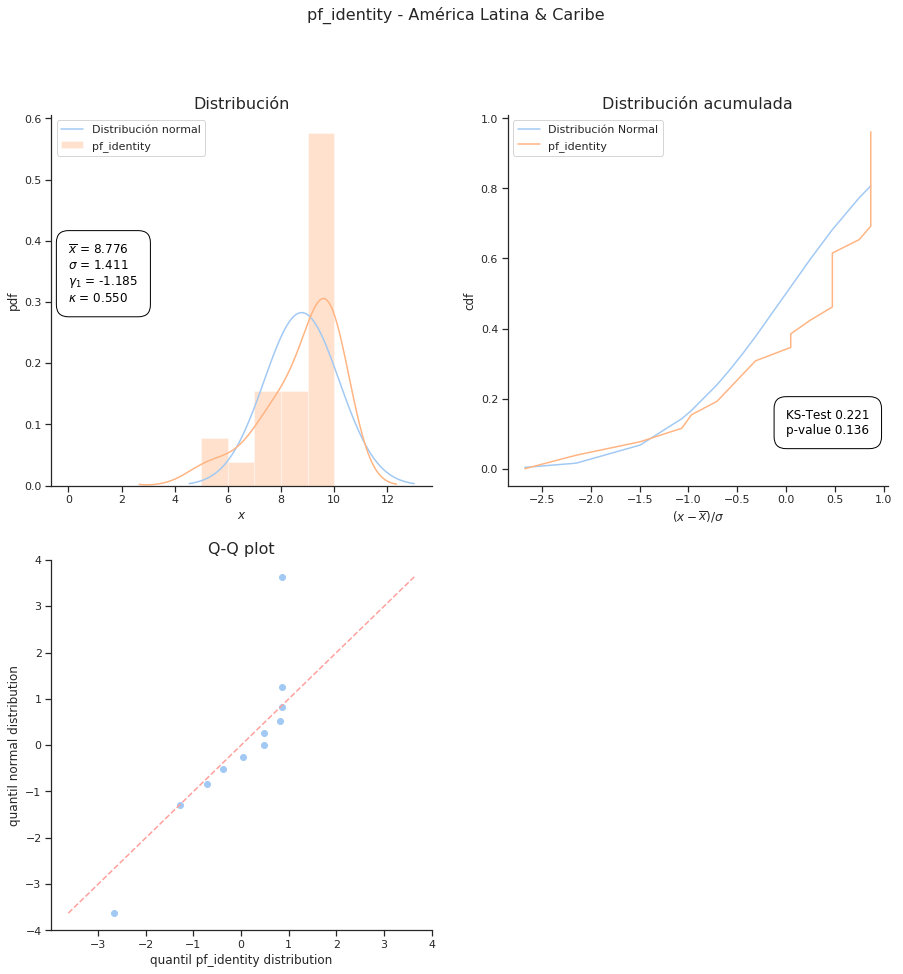

In [29]:
f, axes = plt.subplots(2, 2, figsize=(15, 15))
f.suptitle('pf_identity - América Latina & Caribe', fontsize=16)

datos = data[LA]
datos = datos.pivot_table('pf_identity','countries',aggfunc=['mean'])
datos = datos['mean']['pf_identity']

xm = datos.mean()
std = datos.std()
skew = stats.skew(datos)
kur = stats.kurtosis(datos)
#print("Media: ",xm)
#print("Desviación estandar: ",std)
#print("Skewness: ",skew)
#print("Kurtosis: ",kur)

norm_dist = stats.norm(xm, std)
_x = np.linspace(xm-3.0*std,xm+3.0*std,100)
_y = norm_dist.pdf(_x)
sns.lineplot(_x,_y,label='Distribución normal',ax=axes[0,0])

bins = np.linspace(0,10,11)
sns.distplot(datos, label='pf_identity',ax=axes[0,0],kde=True,norm_hist=True,bins=bins)

axes[0,0].set_ylabel("pdf")
axes[0,0].set_xlabel("$x$")
axes[0,0].legend()
axes[0,0].set_title('Distribución',fontsize=16)
axes[0,0].text(0.0, 0.3, '$\overline{x}$ = %.3f\n$\sigma$ = %.3f\n$\gamma_1$ = %.3f\n$\kappa$ = %.3f' %(xm,std,skew,kur) , color='black', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

#Normalizamos los datos para poder compararlos con la distribución normal (media=0.0,sigma=1.0)
datos = (datos-xm)/std
ks = stats.kstest(datos,'norm')

datos = np.sort(datos)
cum = np.arange(len(datos),dtype=np.float)/float(len(datos))
axes[0,1].plot(datos,stats.norm.cdf(datos),label='Distribución Normal')
axes[0,1].plot(datos,cum,label='pf_identity')
axes[0,1].set_ylabel("cdf")
axes[0,1].set_xlabel("$(x - \overline{x})/\sigma$")
axes[0,1].legend()
axes[0,1].text(0.0, 0.1, 'KS-Test %.3f\np-value %.3f' %(ks[0],ks[1]) , color='black', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
axes[0,1].set_title('Distribución acumulada',fontsize=16)

percs = np.linspace(0,100,11)
qn_a = np.percentile(datos, percs)
qn_b = np.percentile(stats.norm.rvs(size=10000), percs)
axes[1,0].scatter(qn_a,qn_b)
xmin = min(qn_a.min(),qn_b.min())
xmax = max(qn_a.max(),qn_b.max())
axes[1,0].plot([xmin,xmax],[xmin,xmax],'--',color='r')
axes[1,0].set_ylabel("quantil normal distribution")
axes[1,0].set_xlabel("quantil pf_identity distribution")
axes[1,0].set_title('Q-Q plot',fontsize=16)

axes[1,1].axis('off')

sns.despine()

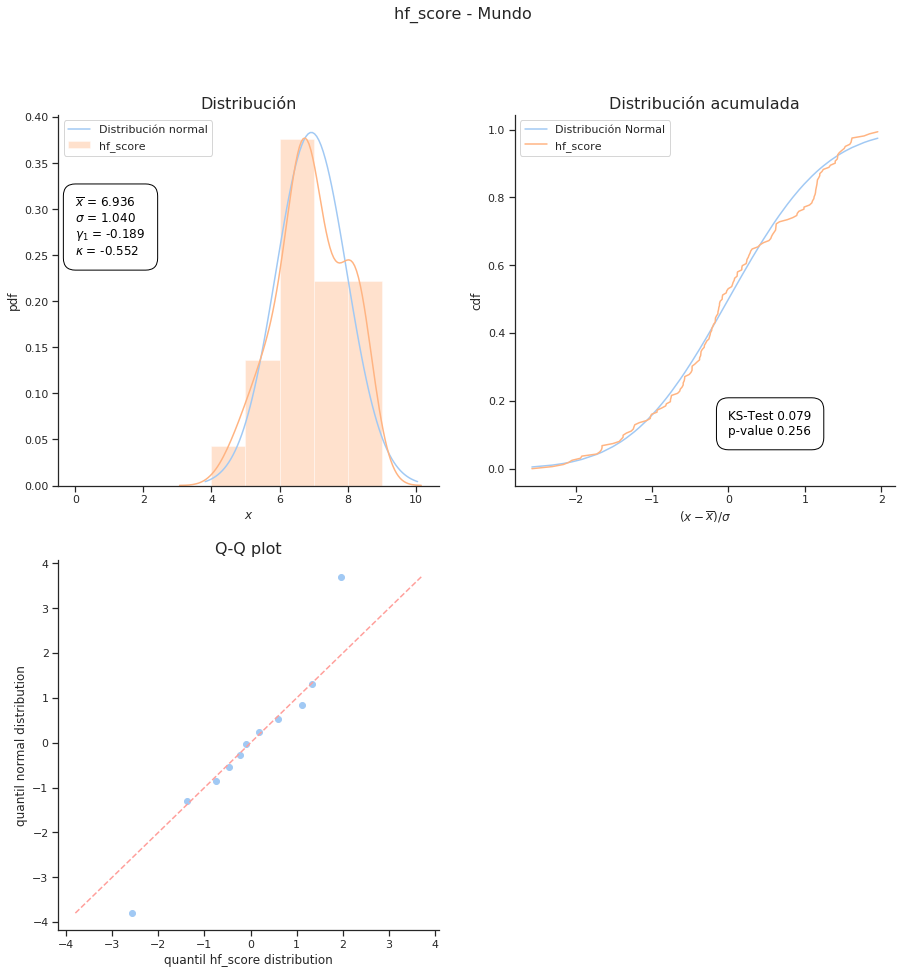

In [30]:
f, axes = plt.subplots(2, 2, figsize=(15, 15))
f.suptitle('hf_score - Mundo', fontsize=16)

datos = data
datos = datos.pivot_table('hf_score','countries',aggfunc=['mean'])
datos = datos['mean']['hf_score']

xm = datos.mean()
std = datos.std()
skew = stats.skew(datos)
kur = stats.kurtosis(datos)
#print("Media: ",xm)
#print("Desviación estandar: ",std)
#print("Skewness: ",skew)
#print("Kurtosis: ",kur)

norm_dist = stats.norm(xm, std)
_x = np.linspace(xm-3.0*std,xm+3.0*std,100)
_y = norm_dist.pdf(_x)
sns.lineplot(_x,_y,label='Distribución normal',ax=axes[0,0])

bins = np.linspace(0,10,11)
sns.distplot(datos, label='hf_score',ax=axes[0,0],kde=True,norm_hist=True,bins=bins)

axes[0,0].set_ylabel("pdf")
axes[0,0].set_xlabel("$x$")
axes[0,0].legend()
axes[0,0].set_title('Distribución',fontsize=16)
axes[0,0].text(0.0, 0.25, '$\overline{x}$ = %.3f\n$\sigma$ = %.3f\n$\gamma_1$ = %.3f\n$\kappa$ = %.3f' %(xm,std,skew,kur) , color='black', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

#Normalizamos los datos para poder compararlos con la distribución normal (media=0.0,sigma=1.0)
datos = (datos-xm)/std
ks = stats.kstest(datos,'norm')

datos = np.sort(datos)
cum = np.arange(len(datos),dtype=np.float)/float(len(datos))
axes[0,1].plot(datos,stats.norm.cdf(datos),label='Distribución Normal')
axes[0,1].plot(datos,cum,label='hf_score')
axes[0,1].set_ylabel("cdf")
axes[0,1].set_xlabel("$(x - \overline{x})/\sigma$")
axes[0,1].legend()
axes[0,1].text(0.0, 0.1, 'KS-Test %.3f\np-value %.3f' %(ks[0],ks[1]) , color='black', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
axes[0,1].set_title('Distribución acumulada',fontsize=16)

percs = np.linspace(0,100,11)
qn_a = np.percentile(datos, percs)
qn_b = np.percentile(stats.norm.rvs(size=10000), percs)
axes[1,0].scatter(qn_a,qn_b)
xmin = min(qn_a.min(),qn_b.min())
xmax = max(qn_a.max(),qn_b.max())
axes[1,0].plot([xmin,xmax],[xmin,xmax],'--',color='r')
axes[1,0].set_ylabel("quantil normal distribution")
axes[1,0].set_xlabel("quantil hf_score distribution")
axes[1,0].set_title('Q-Q plot',fontsize=16)

axes[1,1].axis('off')

sns.despine()

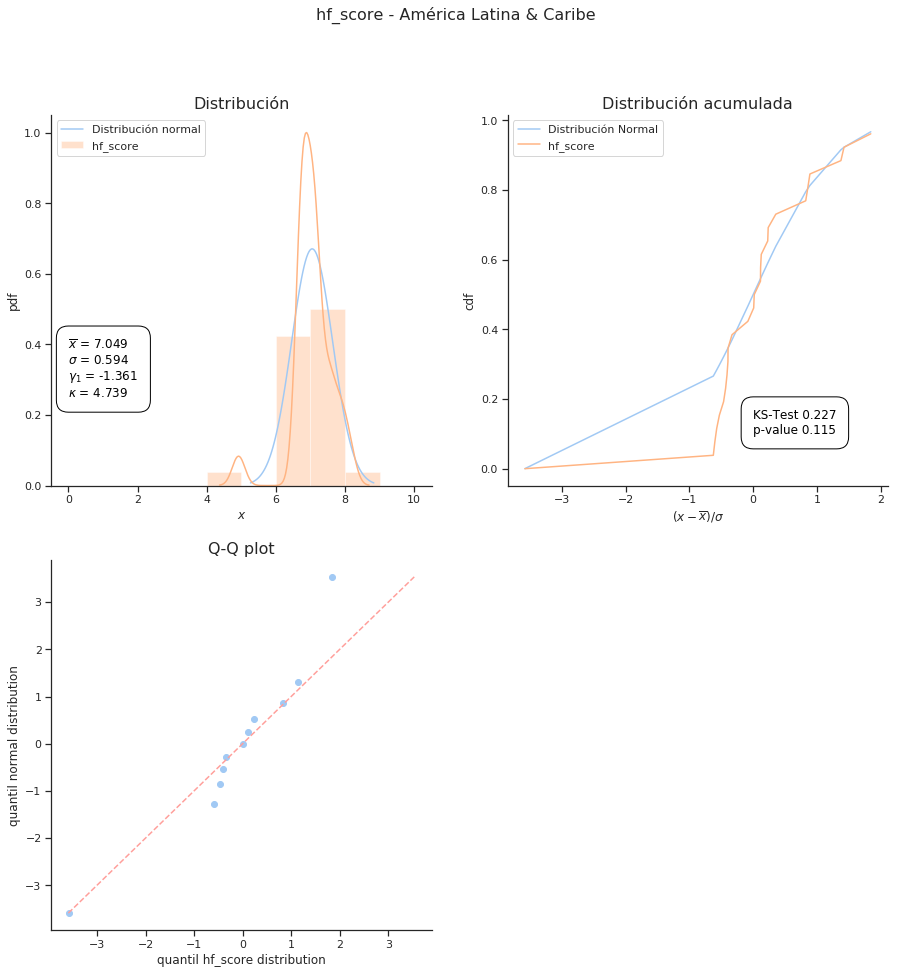

In [31]:
f, axes = plt.subplots(2, 2, figsize=(15, 15))
f.suptitle('hf_score - América Latina & Caribe', fontsize=16)

datos = data[LA]
datos = datos.pivot_table('hf_score','countries',aggfunc=['mean'])
datos = datos['mean']['hf_score']

xm = datos.mean()
std = datos.std()
skew = stats.skew(datos)
kur = stats.kurtosis(datos)
#print("Media: ",xm)
#print("Desviación estandar: ",std)
#print("Skewness: ",skew)
#print("Kurtosis: ",kur)

norm_dist = stats.norm(xm, std)
_x = np.linspace(xm-3.0*std,xm+3.0*std,100)
_y = norm_dist.pdf(_x)
sns.lineplot(_x,_y,label='Distribución normal',ax=axes[0,0])

bins = np.linspace(0,10,11)
sns.distplot(datos, label='hf_score',ax=axes[0,0],kde=True,norm_hist=True,bins=bins)

axes[0,0].set_ylabel("pdf")
axes[0,0].set_xlabel("$x$")
axes[0,0].legend()
axes[0,0].set_title('Distribución',fontsize=16)
axes[0,0].text(0.0, 0.25, '$\overline{x}$ = %.3f\n$\sigma$ = %.3f\n$\gamma_1$ = %.3f\n$\kappa$ = %.3f' %(xm,std,skew,kur) , color='black', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

#Normalizamos los datos para poder compararlos con la distribución normal (media=0.0,sigma=1.0)
datos = (datos-xm)/std
ks = stats.kstest(datos,'norm')

datos = np.sort(datos)
cum = np.arange(len(datos),dtype=np.float)/float(len(datos))
axes[0,1].plot(datos,stats.norm.cdf(datos),label='Distribución Normal')
axes[0,1].plot(datos,cum,label='hf_score')
axes[0,1].set_ylabel("cdf")
axes[0,1].set_xlabel("$(x - \overline{x})/\sigma$")
axes[0,1].legend()
axes[0,1].text(0.0, 0.1, 'KS-Test %.3f\np-value %.3f' %(ks[0],ks[1]) , color='black', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
axes[0,1].set_title('Distribución acumulada',fontsize=16)

percs = np.linspace(0,100,11)
qn_a = np.percentile(datos, percs)
qn_b = np.percentile(stats.norm.rvs(size=10000), percs)
axes[1,0].scatter(qn_a,qn_b)
xmin = min(qn_a.min(),qn_b.min())
xmax = max(qn_a.max(),qn_b.max())
axes[1,0].plot([xmin,xmax],[xmin,xmax],'--',color='r')
axes[1,0].set_ylabel("quantil normal distribution")
axes[1,0].set_xlabel("quantil hf_score distribution")
axes[1,0].set_title('Q-Q plot',fontsize=16)

axes[1,1].axis('off')

sns.despine()

<span style="color:red">Para el caso de pf_identity, no podemos identificar que sigue alguna distribución conocida. Para el caso de hf_score, las distribuciones se asemejan a una distribución normal.
Los gráficos siguientes muestran la evolución del p-value del KS-test comparando contra una distribución normal para las dos variables y separando en LATAM y Mundo.</span>

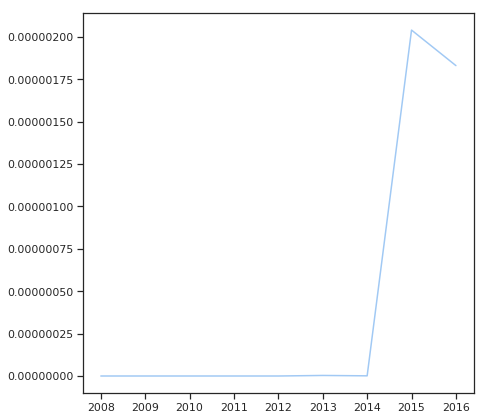

In [32]:
plt.figure(figsize=(7,7))

years = np.arange(2008,2017)

a = np.zeros(len(years))
b = np.zeros(len(years))

for i,year in enumerate(years):
    Year = data['year'] == year
    x = data[Year]['pf_identity'].dropna()
    x = (x-x.mean())/x.std() #normalizar
    ks = stats.kstest(x,'norm')
        
    a[i] = ks[1]
    
plt.plot(years,a)

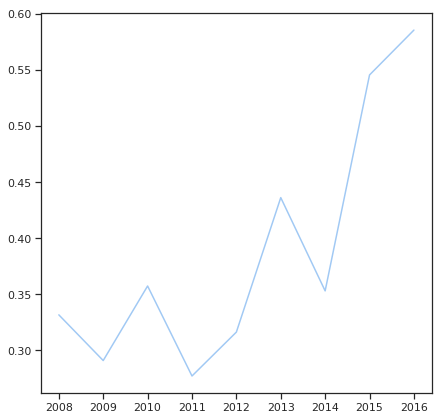

In [33]:
plt.figure(figsize=(7,7))

years = np.arange(2008,2017)

a = np.zeros(len(years))
b = np.zeros(len(years))

for i,year in enumerate(years):
    Year = data['year'] == year
    x = data[Year]['hf_score'].dropna()
    x = (x-x.mean())/x.std() #normalizar
    ks = stats.kstest(x,'norm')
    a[i] = ks[1]
    
plt.plot(years,a)

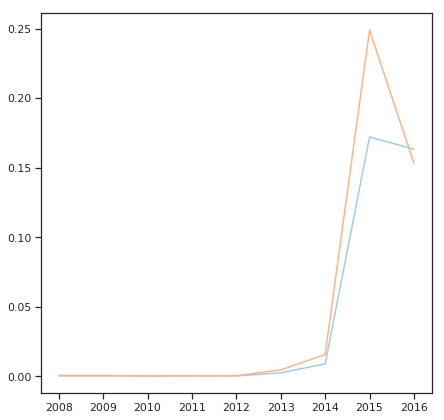

In [34]:
plt.figure(figsize=(7,7))

years = np.arange(2008,2017)

a = np.zeros(len(years))
b = np.zeros(len(years))

for i,year in enumerate(years):
    Year = data['year'] == year
    x = data[Year & LA]['pf_identity'].dropna()
    x = (x-x.mean())/x.std() #normalizar
    ks = stats.kstest(x,'norm')
    
    x = data[Year & LA & ~VNZ]['pf_identity'].dropna()
    x = (x-x.mean())/x.std() #normalizar
    ks1 = stats.kstest(x,'norm')
       
    a[i] = ks[1]
    b[i] = ks1[1]
    
plt.plot(years,a)
plt.plot(years,b)

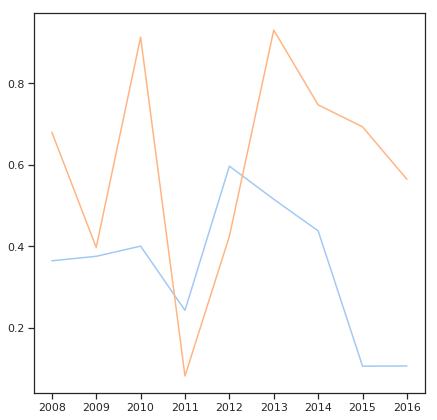

In [35]:
plt.figure(figsize=(7,7))

years = np.arange(2008,2017)

a = np.zeros(len(years))
b = np.zeros(len(years))

for i,year in enumerate(years):
    Year = data['year'] == year
    x = data[Year & LA]['hf_score'].dropna()
    x = (x-x.mean())/x.std() #normalizar
    ks = stats.kstest(x,'norm')
    
    x = data[Year & LA & ~VNZ]['hf_score'].dropna()
    x = (x-x.mean())/x.std() #normalizar
    ks1 = stats.kstest(x,'norm')
        
    a[i] = ks[1]
    b[i] = ks1[1]
    
plt.plot(years,a)
plt.plot(years,b)

<span style="color:red">Notamos que si se hace el KS-test para el índice hf_score para los 9 años (datos en bruto) el resultado de la prueba nos indica que la distribución no sigue una distribución normal. Si en cambio, primero calculamos el promedio temporal del índice por país, el resultado del KS-test nos dice que no podemos descartar la hipótesis de que el índice sigue una distribución normal. Lo mismo ocurre si lo segmentamos por año, el KS-test nos dice que no podemos descartar la hipótesis nula.</span>

**4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?**

<span style="color:red">Calculamos la curtosis y la asimetría solo para el hf_score porque pf_identity no sigue una distribución normal.</span>

In [36]:
pPaises=data.pivot_table(['pf_identity','hf_score'],'countries',aggfunc='mean')
pLatam=data[LA].pivot_table(['pf_identity','hf_score'],'countries',aggfunc='mean')
#Calculo con serie promedio para LATAM
print('LATAM - Asimetría: ',stats.skew(pLatam['hf_score']))
print('LATAM - Curtosis : ',stats.kurtosis(pLatam['hf_score']))

#Calculo con serie promedio para Todo el Mundo
print('WORLD - Asimetría: ', stats.skew(pPaises['hf_score']))
print('WORLD - Curtosis : ', stats.kurtosis(pPaises['hf_score']))

LATAM - Asimetría:  -1.361150664228333
LATAM - Curtosis :  4.738842731941911
WORLD - Asimetría:  -0.18933715533222384
WORLD - Curtosis :  -0.552307033242537


<font style="color:red">**Para Latam**
* Tiene asimetría negativa, indicando que la serie se alarga hacia la izquierda.
* Curtosis alta indicaría que una gráfico alargado alrededor de la media.    
    
**Para Todo el Mundo:**
* Tiene asimetría negativa, indicando que la serie se alarga hacia la izquierda.
* Curtosis baja indicaría que una gráfico aplanado alrededor de la media.
</font>

## 4. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


**1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?**

ValueError: max must be larger than min in range parameter.

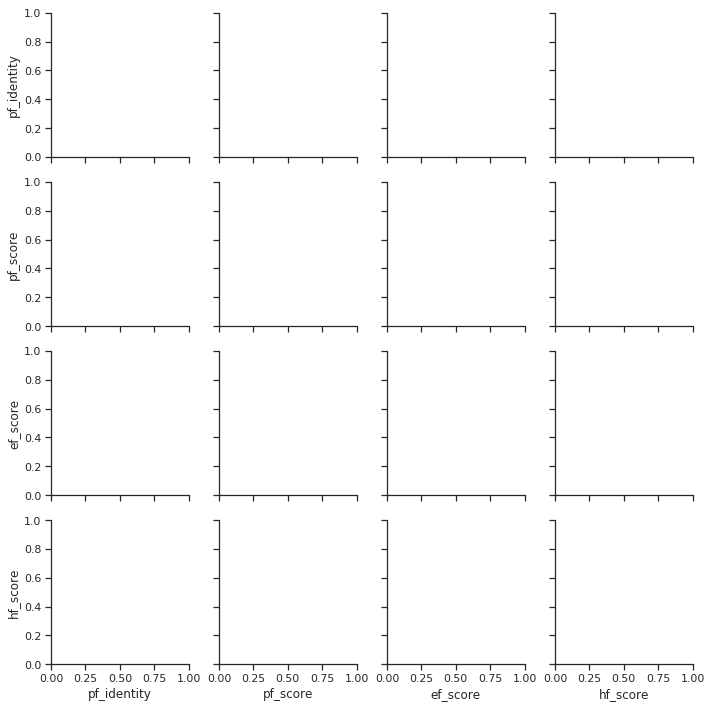

In [37]:
sns.pairplot(
    data=data,
    vars=['pf_identity','pf_score','ef_score','hf_score'],
    markers='.')

<span style="color:red">Podemos observar que entre el hf_score y el conjunto ef_score/pf_score existe una correlacion marcada. Y para el pf_identity tambien se puede observar una correlacion no tan marcada con el hf_score /pf_score. Finalmente no se muestra correlacion muy debil entre el pf_identity y el ef_score.
No es adecuado para el pf_identity ya que este indice muestra un comportamiento categorico/discreto y no continuo.</span>

**2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.**

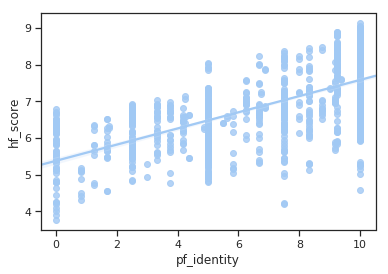

In [38]:
sns.regplot('pf_identity','hf_score',data)

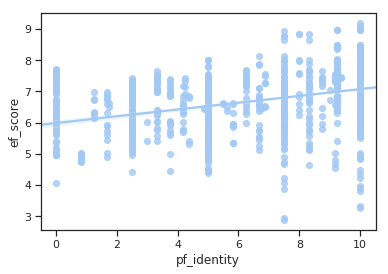

In [39]:
sns.regplot('pf_identity','ef_score',data)

**CORRELACION FUERTE: coor > 0.8, MODERADA: entre 0.5 y 0.8, DEBIL: < 0.5**

<span style="color:red">Existe una correlacion moderada entre pf_identity y hf_score, y una correlacion debil entre pf_iedntity y ef_score.</span>


**3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.**

In [ ]:
corr = data[fields].corr(method='spearman')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)


<font style="color:red">Calculamos el coeficiente de correlación de Spearman ya que las variables cuantitativas ordinales y no podemos aseverar que sigan una distribución normal.
Observamos que hay una correlación de tipo débil (<0.5) entre la variable 'pf_identity' y la variable 'ef_score', así mismo hay una correlación de tipo moderada (0.5<corr<0.8) entre la variable 'pf_identity' y la variable 'hf_score'.
Descartamos Pearson ya que el coeficiente pf_identity no proviene de una distribucion normal.</font>

**4 .[Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable region es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros).**

/home/marioagustin/MiniConda/envs/diplodatos/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


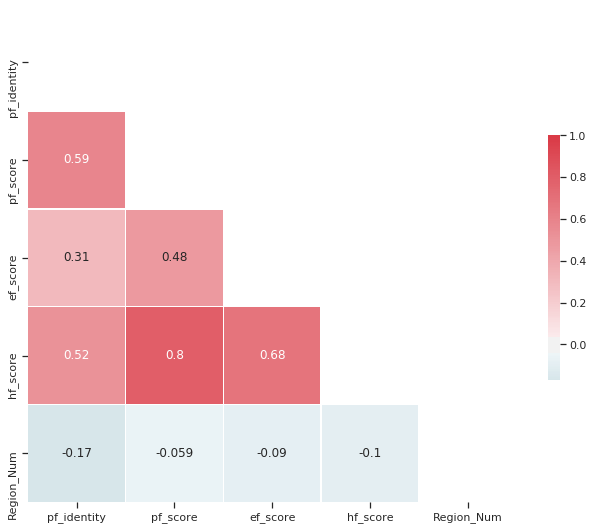

In [40]:
fields = ['pf_identity','pf_score','ef_score','hf_score','region']
dd = data[fields]
dd["Region_Num"] = dd["region"].astype("category").cat.codes

corr = dd.corr(method='kendall')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

ValueError: max must be larger than min in range parameter.

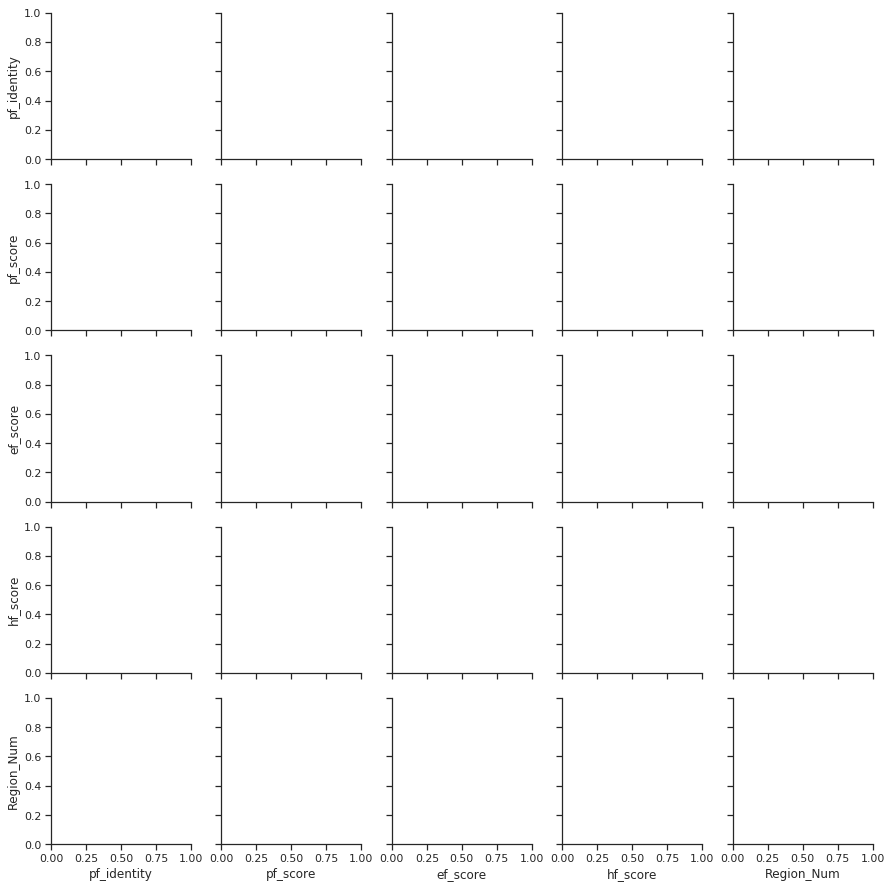

In [41]:
sns.pairplot(
    data=dd,
    vars=['pf_identity','pf_score','ef_score','hf_score','Region_Num'],
    markers='+')

In [54]:
_data = pandas.DataFrame(data[Year][['ISO_code','region','pf_identity','hf_score','ef_score','pf_score']])

In [55]:
_m = pandas.pivot_table(_data,values=['pf_identity','hf_score','ef_score','pf_score'],columns='region')

In [56]:
a = _m[_data['region']].values

In [57]:
_data['pf_identity_by_region'] = pandas.Series(a[2],index=_data.index)
_data['hf_score_by_region'] = pandas.Series(a[1],index=_data.index)
_data['ef_score_by_region'] = pandas.Series(a[0],index=_data.index)
_data['pf_score_by_region'] = pandas.Series(a[3],index=_data.index)

In [58]:
import plotly_express as px
px.choropleth(_data, locations="ISO_code", color="pf_identity_by_region", hover_name="region", 
              color_continuous_scale=px.colors.carto.Fall, projection="natural earth")

In [59]:
px.choropleth(_data, locations="ISO_code", color="pf_score_by_region", hover_name="region", 
              color_continuous_scale=px.colors.carto.Fall, projection="natural earth")

In [60]:
px.choropleth(_data, locations="ISO_code", color="ef_score_by_region", hover_name="region", 
              color_continuous_scale=px.colors.carto.Fall, projection="natural earth")

In [61]:
px.choropleth(_data, locations="ISO_code", color="hf_score_by_region", hover_name="region", 
              color_continuous_scale=px.colors.carto.Fall, projection="natural earth")